# **Lab experience #4 (STUDENTS): Clustering with k-means**

This fourth lab session aims to apply **k-means** algorithm and its variants to cluster an unknown matrix of data (with low dimensionality and continuous attributes). This lab session refers to Prof. Stella's lecture no.5 "Cluster Analysis: k-means clustering".

In this lab, you are going to **(re-)use already known packages** (matplotlib, scipy, numpy, seaborn, scikit-learn.preprocessing). Check the three previous lab solutions.
Moreover, the **sklearn.cluster.KMeans** package will be introduced to cluster data (see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)).



Notes:
*   to rapidly access the documentation you can also create a new code cell and type in "function_name?" (e.g., matplotlib?) and run the cell.
*   to execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously or click on the "play" icon.


**Read the step-by-step instructions below** carefully and write your own code to fill the missing steps. **Guiding slides** are available on Moodle with the list of the steps to perform.

**The number of clusters (K) will be given at the beginning of the lab session.** Then, keep ```n_cluster``` always equal to K.



### Load the input data and import useful packages

In this cell, you load **the input data** (it will be given tomorrow, at the beginning of the lab).

The number of clusters (K) will be also given.

---



# UTILITY FUNCTIONS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [ ]:
# THIS IS A **NEW METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO find visualize data in 2D with clusters in different colours

def PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL):

  '''
  INPUT
  data2visualize    - data matrix to visualize
  NCOMP             - no. of components to decompose the dataset during PCA
  LABELS            - labels given by the clustering solution
  PAL               - palette of colours to distinguish between clusters
  '''

  '''
  OUTPUT
  Two figures: one using PCA and one using tSNE
  '''


  # PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components=NCOMP)
  pca_result = pca.fit_transform(data2visualize)
  print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

  # tSNE
  from sklearn.manifold import TSNE
  print('\nApplying tSNE...')
  np.random.seed(100)
  tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300)
  tsne_results = tsne.fit_transform(data2visualize)


  # Plots
  fig1000 = plt.figure(figsize=(10,5))
  fig1000.suptitle('Dimensionality reduction of the dataset', fontsize=16)


  # Plot 1: 2D image of the entire dataset
  ax1 = fig1000.add_subplot(121)
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
  ax1.set_xlabel('Dimension 1', fontsize=10)
  ax1.set_ylabel('Dimension 2', fontsize=10)
  ax1.title.set_text('PCA')
  plt.legend([],[], frameon=False)
  plt.grid()

  ax2= fig1000.add_subplot(122)
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)
  ax2.set_xlabel('Dimension 1', fontsize=10)
  ax2.set_ylabel('Dimension 2', fontsize=10)
  ax2.title.set_text('tSNE')
  plt.legend([],[], frameon=False)
  plt.grid()
  plt.show()

In [ ]:
# [FROM SOLUTION OF LAB#3] THIS IS A **NEW METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO compute the intra- and inter-cluster distances

def intra_inter_cluster_distances(data, K, labels, cluster_centers, distance_metric):

  '''
  INPUT
  data            - data matrix for which to compute the proximity matrix
  K               - the expected number of clusters
  labels          - predicted labels from the clustering solution applied to data
  cluster_centers - cluster centres from the clustering solution applied to data
  distance_metric - metric to compute the distances within and between clusters. Here, you use the same metric for both measurements (but it might be possible to use two different metrics)
  '''

  '''
  OUTPUT
  d               - intra-cluster distance
  D               - inter-cluster distances
  '''

  from scipy.spatial.distance import pdist as pdist
  from scipy.spatial.distance import squareform as sf


  # Intra-cluster distances (average over all pairwise distances) ----------------- NOTE: bug fixed here!
  PM = pdist(data, metric=distance_metric)
  PM = sf(PM).round(2)

  d = np.zeros(K)
  for k in range(K):
    ind = np.array( np.where(labels == k ) )
    for r in range(ind.size):
      d[k] = d[k] + np.sum( PM[ [ind[0][r]], [ind] ] )
    d[k] = d[k]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
    d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
  print("The intra-cluster distance of the clusters are: ", d.round(2))


  # Inter-cluster distance ---------------------------------------------------
  D = pdist(cluster_centers, metric=distance_metric)
  D = sf(D).round(2)
  print("\nAll pair-wise inter-cluster distances:\n", D)

  return d, D

---

In [ ]:
# Number of clusters
K = 2

# Load the dataset
X = np.load('Dataset_lab04.npy')


# Define a palette of colours for the K clusters (useful for the next tasks)
PAL = ['black', 'red', 'green', 'blue', 'yellow', 'orange']

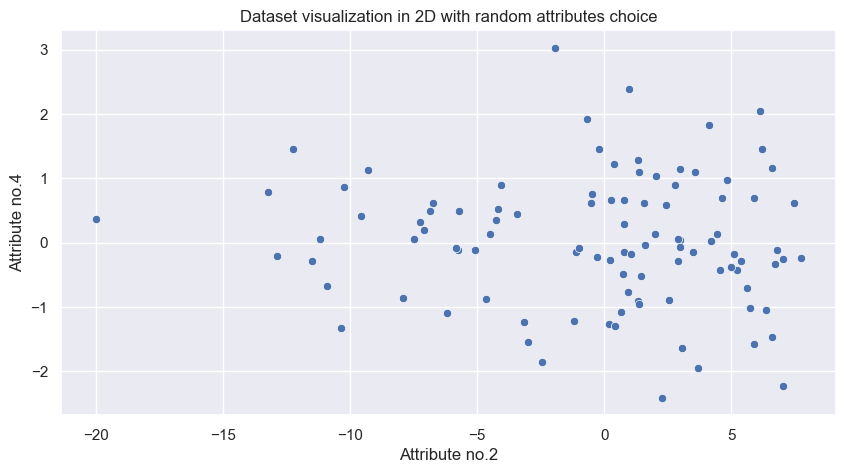

In [328]:
# Visualization (example)
# -----------------------
feat1 = 2
feat2 = 4
fig0 = plt.figure('Check the dataset', figsize=(10,5))
sns.scatterplot(x = X[:,feat1], y = X[:,feat2])
sns.set_theme(style='dark')
plt.title('Dataset visualization in 2D with random attributes choice')
plt.xlabel('Attribute no.%s' % feat1)
plt.ylabel('Attribute no.%s' % feat2)
plt.grid()
plt.show()

**You can visualize the dataset in other two different ways, by using PCA and tSNE.** In this way, you don't need to a-priori select two attributes, but the algorithms just compute the two most relevant dimensions to plot. A *utility method called PCA_tSNE_visualization* is provided at the bottom of this script. Remember to initialize (run) that snippet of code (cell) before running the rest of the code to avoid errors.

PCA: explained variation per principal component: [0.76 0.11]

Applying tSNE...


/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_92808/3648559201.py:40: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_92808/3648559201.py:48: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


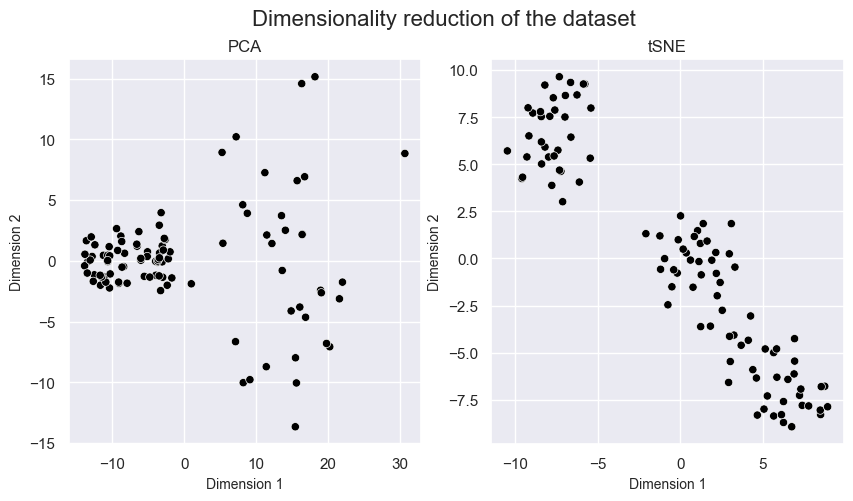

In [329]:
# BEFORE RUNNING THIS CELL, GO TO THE END AND RUN THE METHOD CALLED "PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL)"

# [NO NEED TO CHANGE] Now, you can run the following line
PCA_tSNE_visualization(X, 2, np.ones(X.shape[0]), PAL)

# **Task 1** Run k-means (basic) with random seeds initialization (one single run)

To apply this step, you need to run the following command:


```
kmeans = KMeans(n_clusters=K, init='random', n_init=1, max_iter=300, tol=0.0001, verbose=1, random_state=INTEGER NUMBER).fit(DATA)
```

Check the sklearn.cluster.KMeans documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).


**Arguments explanation:**


**```init```**: either k-means++ (default) or basic kmeans (random). **Here, we want to apply basic kmeans, then set ```init='random'```**.

**```n_init```**: A "run" is one application of the k-means algorithm. When does the algorithm stop in that run? Either after ```max_iter``` iterations or when the change in the cluster centers between two consecutive iterations is less than the ```tol``` value (see documentation). In case you use ```n_init```>1, then the algorithm is launched ```n_init``` times (i.e., for ```n_init``` "runs"), with each repetition started from a different choice of the initial seeds. **IN THIS FIRST TASK, we force the algorithm to be run ONLY ONCE.** (then, keep ```n_init=1```).

**```verbose```** is set to 1 if you want to read the information regarding the progress of the algorithm (e.g., the inertia value at each step). Alternatively, you can set this parameter to 0.

**```random_state```** determines the random number generation for centroid initialization. Use an _int_ to make the randomness deterministic (from the documentation). In this task, keep ```random_state``` equal to a number, to obtain the same result every time you run this step.

Always keep **```max_iter```** and **```tol```**  equal to default (```max_iter=300``` and ```tol=0.0001```).


_DISCLAIMER for Task 1: **The way you are going to apply k-means in Task 1 is *not* the optimal way. However, this is asked to be done** (e.g., with ```n_init=1```) to let you learn more clearly how the basic version of k-means works, and to make its issues appearing clearer to all of you._

In [330]:
from sklearn.cluster import KMeans

# (k-means) Single run with a single seeds initialization
kmeans = KMeans(n_clusters=K, init='random', n_init = 1, max_iter = 300, tol=0.0001, verbose = 1, random_state = 42)
kmeans.fit(X)


# Print the final inertia value. Hint: # the final SSE of this clustering solution can be retrieved by the KMeans attribute (i.e., output) named kmeans.inertia_
print('For this clustering solution (one single k-means run), the final SSE is: %.2f '% kmeans.inertia_)


Initialization complete
Iteration 0, inertia 20337.778600603197.
Iteration 1, inertia 10353.18346146683.
Iteration 2, inertia 7761.385625168004.
Iteration 3, inertia 6018.643695982629.
Iteration 4, inertia 6011.641138011965.
Converged at iteration 4: strict convergence.
For this clustering solution (one single k-means run), the final SSE is: 6011.64 


In [331]:
kmeans.cluster_centers_[:,0], kmeans.cluster_centers_

(array([0.13666667, 0.00441176]),
 array([[ 1.36666667e-01,  6.12121212e-02,  2.96923846e+00,
          2.89113636e+00, -1.57575758e-02, -3.09090909e-02,
          3.29270264e+00,  7.34848485e-02,  3.62100606e+00,
         -1.16515152e-01],
        [ 4.41176471e-03, -1.73823529e-01, -6.88257408e+00,
         -9.33475340e+00,  1.00000000e-01, -1.81764706e-01,
         -7.77721847e+00,  2.35294118e-03, -7.14274093e+00,
          1.08235294e-01]]))

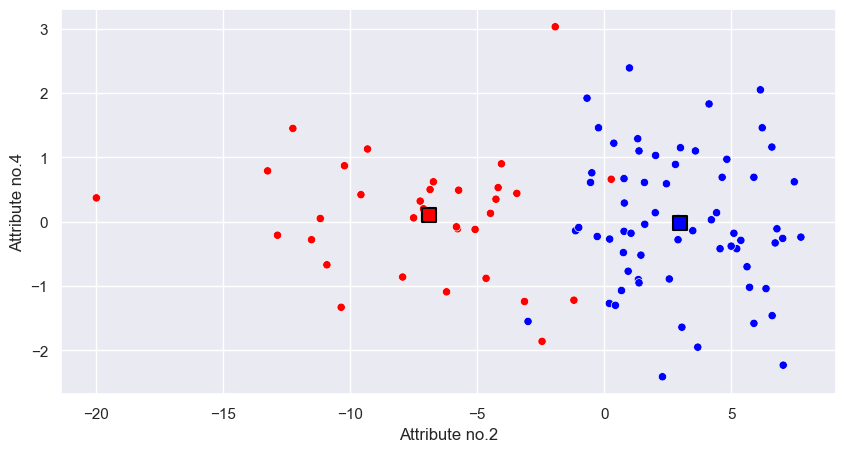

PCA: explained variation per principal component: [0.76 0.11]

Applying tSNE...


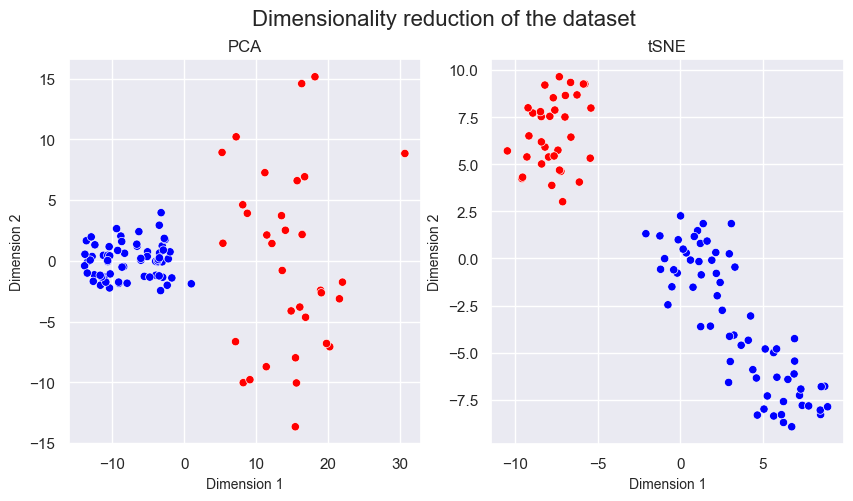

In [332]:
# Make a 2D visualization of this clustering solution (you can use the scatterplot with two features at your choice, or using PCA/tSNE).
# ---------------------------------------------------
# Comments:
# 1. You can exploit the KMeans output named kmeans.labels_ to distinguish objects assigned (by the algorithm) to different classes (as you DON'T HAVE the groundtruth).
# 2. You can retrieve the coordinates of the final cluster centroids from the KMeans output named kmeans.cluster_centers_ (you don't need to compute centroids manually this time!)

# SCATTERPLOT WITH TWO FEATURES: plot points with color associated with proposed class AND centroids
fig1 = plt.figure('Single run - Random seeds initialization', figsize=(10,5))
PAL = ['blue', 'red']
LABELS = kmeans.labels_

# here put your scatterplot
x = X[:, feat1]
y = X[:, feat2]
sns.scatterplot(x=x, y=y, hue=LABELS, palette=PAL)

for k in range(K):
    plt.scatter(x=kmeans.cluster_centers_[k,feat1], y=kmeans.cluster_centers_[k,feat2], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)

sns.set_theme(style='dark')
plt.xlabel('Attribute no.%s' % feat1)
plt.ylabel('Attribute no.%s' % feat2)
plt.legend([],[], frameon=False)

plt.grid()
plt.show()


# PCA/tSNE
PCA_tSNE_visualization(X, 2, LABELS, PAL)

Let's also evaluate the average intra-cluster distance and the inter-cluster distances (**use the code provided with the solution to Lab#3!**).

In [333]:
# Compute the intra- and inter-clusters distances. Hint: use the code provided by the utility function at the bottom of this page (already introduced in Lab03)
[d, D] = intra_inter_cluster_distances(X, K, kmeans.labels_, kmeans.cluster_centers_, 'euclidean')

The intra-cluster distance of the clusters are:  [ 7.2 14.8]

All pair-wise inter-cluster distances:
 [[ 0.   22.02]
 [22.02  0.  ]]


In [334]:
# Keep memory of the SSE value:
WORST_SSE = kmeans.inertia_
print(WORST_SSE)

6011.641138011965


# **Task 2** Run multiple runs of the basic k-means

_**DISCLAIMER for Task 2:** This is also a "teaching purpose" application of k-means. In this task, you are asked to (manually) repeat k-means for multiple times (i.e., "runs"), every time with a different seeds random initialization, plot the SSE at every run, and finally extract the best clustering solution._

You need to run KMeans for ```NINIT``` times (implemented as a loop), with ```n_init``` set to 1. Keep ```max_iter``` and ```tol``` to default (```max_iter=300``` and ```tol=0.0001```), and ```n_cluster``` equals to K. You want to see the effect of random seeds initialization at every new (independent) run of the algorithm. Then, **let the random number generator do its job: set ```random_state=None```.** At the same time, you want that this step is repeatable, then preliminarily reset the seed.

_Note: It might be possible to let KMeans do this task by itself (setting n_init=NINIT). This would be completely fine - and it's actually the best way to apply the basic k-means. However, **for this Task 2** you are also require to plot a figure with the SSE at each run and this is not possible with the default Python package._

In [335]:
# Reset the seed
np.random.seed(51)  # To make the following snippet of code repeatable

Initialization complete
Iteration 0, inertia 10276.64823418266.
Iteration 1, inertia 6071.628582305957.
Iteration 2, inertia 6011.641138011965.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 29494.45315033448.
Iteration 1, inertia 11030.9893230145.
Iteration 2, inertia 8164.478120645247.
Iteration 3, inertia 6018.643695982629.
Iteration 4, inertia 6011.641138011965.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 8628.06837040577.
Iteration 1, inertia 6035.718391592438.
Iteration 2, inertia 6011.641138011965.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 14624.291750092932.
Iteration 1, inertia 6018.643695982629.
Iteration 2, inertia 6011.641138011965.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 27019.892145225316.
Iteration 1, inertia 11131.803936800738.
Iteration 2, inertia 8023.817136703275.
Iteration 3, in

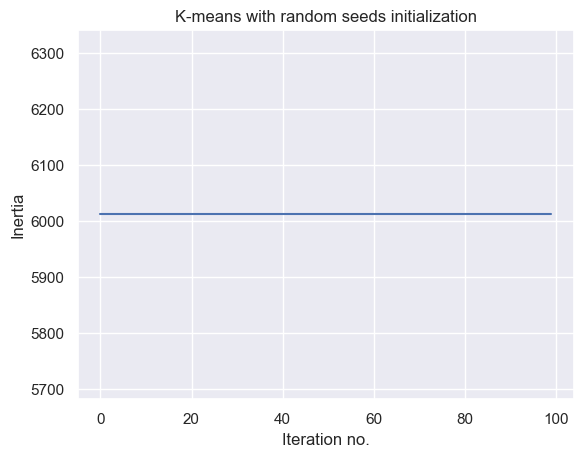

In [336]:
# (k-means) Multiple (independent) runs with a random seeds initialization
NINIT = 100
inertia_values = np.ones(NINIT)*1e100     # I changed this line to be sure there is no memory of inertia values from later blocks of code

# Loop to repeatedly run k-means
for i in range(NINIT):
    kmeans = KMeans(n_clusters = K, init = 'random', n_init = 1, max_iter = 300, tol = 0.0001, verbose = 1, random_state = None)
    kmeans.fit(X)
    inertia_values[i] = kmeans.inertia_


fig2 = plt.figure()
plt.plot(inertia_values)
plt.title('K-means with random seeds initialization')
plt.xlabel('Iteration no.')
plt.ylabel('Inertia')
plt.grid()


# Report the average, std, and min SSE across runs
inertia_mean = inertia_values.mean()
inertia_std  = inertia_values.std()
print('The mean SSE is: %.2f (%.2f) ' % (inertia_mean, inertia_std))
print('The best SSE is: %.2f ' % np.min(inertia_values))

In [337]:
kmeans.cluster_centers_

array([[ 1.36666667e-01,  6.12121212e-02,  2.96923846e+00,
         2.89113636e+00, -1.57575758e-02, -3.09090909e-02,
         3.29270264e+00,  7.34848485e-02,  3.62100606e+00,
        -1.16515152e-01],
       [ 4.41176471e-03, -1.73823529e-01, -6.88257408e+00,
        -9.33475340e+00,  1.00000000e-01, -1.81764706e-01,
        -7.77721847e+00,  2.35294118e-03, -7.14274093e+00,
         1.08235294e-01]])

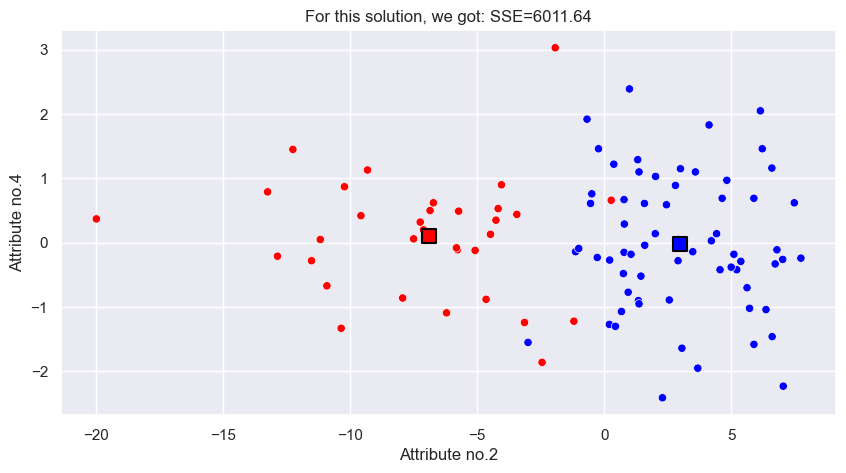

In [338]:
# Scatterplot with random choice of the features to represent the dataset (same features as above) in the best clustering solution.
fig3 = plt.figure('Best clustering solution across mutiple runs with random seeds initialization', figsize=(10,5))
# here put your scatterplot
sns.scatterplot(x=x, y=y, hue=kmeans.labels_, palette=PAL)

for k in range(K):
    plt.scatter(x=kmeans.cluster_centers_[k,feat1], y=kmeans.cluster_centers_[k,feat2], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
    
sns.set_theme(style='dark')
plt.xlabel('Attribute no.%s' % feat1)
plt.ylabel('Attribute no.%s' % feat2)
plt.title("For this solution, we got: SSE=%.2f" % np.min(inertia_values))
plt.legend([],[], frameon=False)
plt.grid()
plt.show()

PCA: explained variation per principal component: [0.76 0.11]

Applying tSNE...


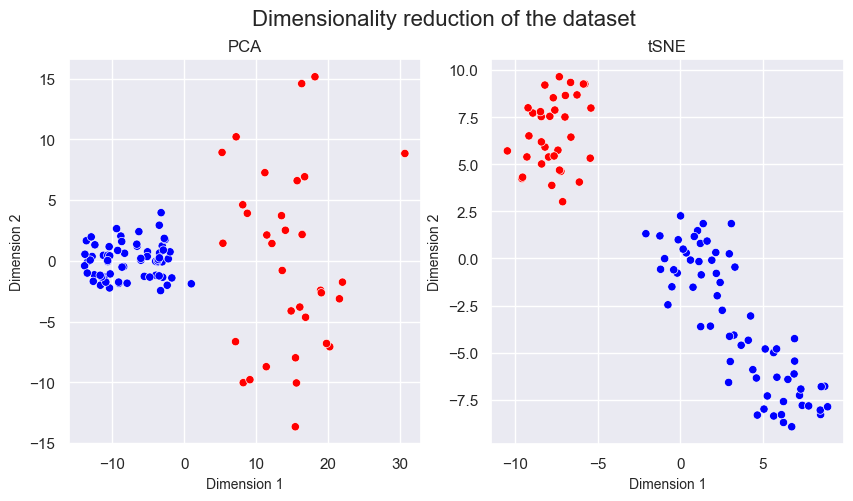

In [339]:
# Visualize the clustering solution using PCA/tSNE with colours associated with clusters (clusters given by the current clustering solution)
PCA_tSNE_visualization(X, 2, kmeans.labels_, PAL)

In [340]:
# Compute the intra- and inter-clusters distances
[d, D] = intra_inter_cluster_distances(X, K, kmeans.labels_, kmeans.cluster_centers_, 'euclidean')

The intra-cluster distance of the clusters are:  [ 7.2 14.8]

All pair-wise inter-cluster distances:
 [[ 0.   22.02]
 [22.02  0.  ]]


# **Task 3: Apply k-means++** Apply the smarter version of k-means (k-means++)

_**DISCLAIMER for Task 3:** Another "teaching purpose" block of code. This time, you were asked to **firstly run a single "run" of k-means++** (```n_init``` to 1), and compare it with the "best" solution obtained with k-means, just earlier._

Keep ```max_iter=300```, ```tol=0.0001```, and ```n_cluster``` to K.

I suggest you to set ```random_state``` to an integer value to ensure repeatibility of this step.

Then, you can increase ```n_init``` and you should observe that it is generally more efficient than basic kmeans (with ```n_init``` set to a low number, e.g., 3, you can get the best result obtained by basic kmeans with ```n_init```=10).

Initialization complete
Iteration 0, inertia 10517.79777991072.
Iteration 1, inertia 6082.194504186298.
Iteration 2, inertia 6011.641138011965.
Converged at iteration 2: strict convergence.
The final SSE is: 6011.64 


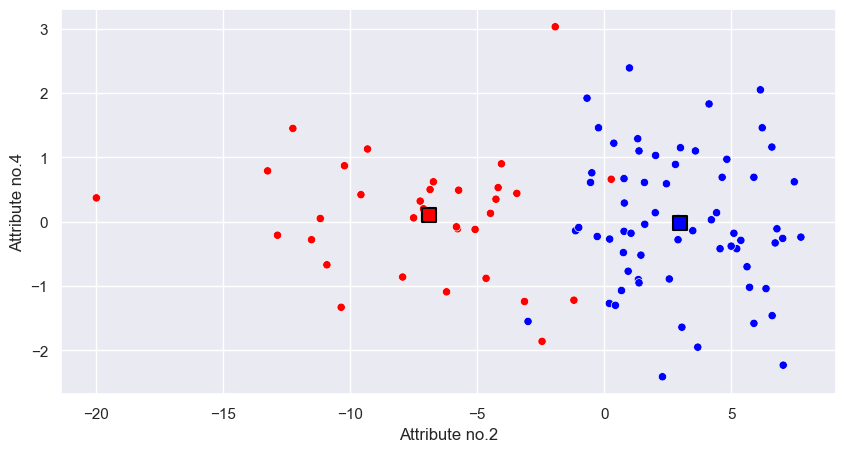

In [341]:
# (k-means++) Run k-means++. Hint: check documentation to see how to set the parameters to run k-means++
# with just 1 n_init we get the same result, and usually we converge in just 2 iterations
kmeans = KMeans(n_clusters=K, init='k-means++', n_init = 1, max_iter = 300, tol=0.0001, verbose = 1, random_state = 42).fit(X)

# Print the final SSE value
print('The final SSE is: %.2f '% kmeans.inertia_)

# Scatterplot (use two features, at your choice, to visualize the objects)
fig4 = plt.figure('Single run - Random seeds initialization', figsize=(10,5))

# put here your scatterplot
sns.scatterplot(x=x, y=y, hue=kmeans.labels_, palette=PAL)
for k in range(K):
    plt.scatter(x=kmeans.cluster_centers_[k,feat1], y=kmeans.cluster_centers_[k,feat2], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
sns.set_theme(style='dark')
plt.xlabel('Attribute no.%s' % feat1)
plt.ylabel('Attribute no.%s' % feat2)
plt.legend([],[], frameon=False)
plt.grid()
plt.show()

PCA: explained variation per principal component: [0.76 0.11]

Applying tSNE...


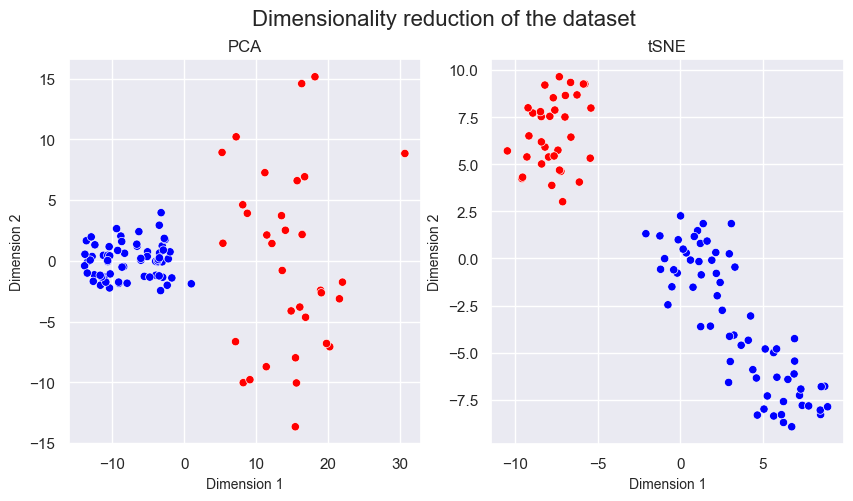

In [342]:
# Visualize the clustering solution using PCA/tSNE with colours associated with clusters (clusters given by the current clustering solution)
PCA_tSNE_visualization(X, 2, kmeans.labels_, PAL)

In [343]:
# Compute the intra- and inter-clusters distances
[d, D] = intra_inter_cluster_distances(X, K, kmeans.labels_, kmeans.cluster_centers_, 'euclidean')

The intra-cluster distance of the clusters are:  [ 7.2 14.8]

All pair-wise inter-cluster distances:
 [[ 0.   22.02]
 [22.02  0.  ]]


# **Task 4: Pre-processing**: Here, you can apply pre-processing (i.e., scaling).

In [344]:
# Scaling
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler

# StandardScaler: z = (x - u) / s
# RobustScaler: it removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).
#               The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
# Normalizer:   Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled
#               independently of other samples so that its norm (l1, l2 or inf) equals one.
# MinMaxScaler: Transform features by scaling each feature to a given range.
#               X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#               X_scaled = X_std * (max - min) + min


# Choose and initialize the scaler you want to use. Hint: check previous lab to see correct syntax
scaler = StandardScaler()

# Apply the scaling to data. Hint: check previous lab to see how to apply scaling
X_transformed = scaler.fit_transform(X)

# **Task 5**: Compare results after pre-processing

Initialization complete
Iteration 0, inertia 1700.6288013101932.
Iteration 1, inertia 746.8533779565108.
Iteration 2, inertia 729.0561960680759.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1370.6261571666637.
Iteration 1, inertia 874.9792721538672.
Iteration 2, inertia 813.3434007658877.
Iteration 3, inertia 756.8052222891785.
Iteration 4, inertia 730.2019147532915.
Iteration 5, inertia 729.0561960680759.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1416.103583315748.
Iteration 1, inertia 734.1294006314956.
Iteration 2, inertia 729.0561960680759.
Converged at iteration 2: strict convergence.
The final SSE is: 729.06 


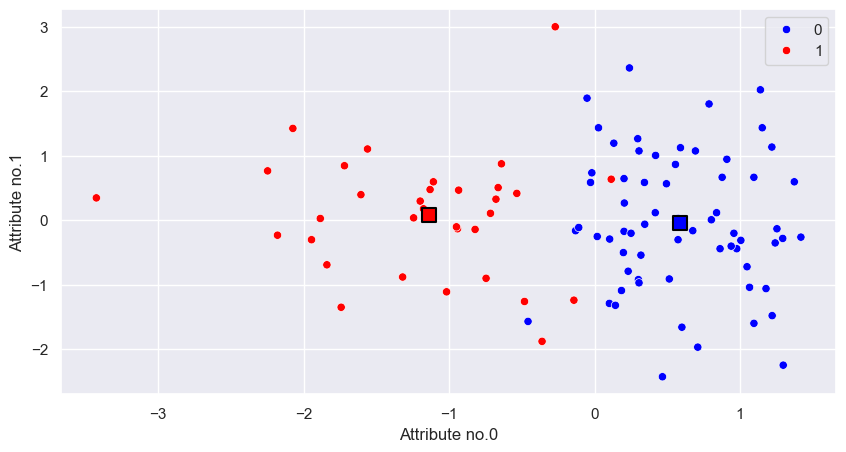

In [345]:
# (k-means++) Apply clustering on the pre-processed dataset
kmeansPLUStrans = KMeans(n_clusters=K, init='k-means++', n_init = 3, max_iter = 300, tol=0.0001, verbose = 1, random_state = 358).fit(X_transformed)


# Print the SSE value in this case
print('The final SSE is: %.2f '% kmeansPLUStrans.inertia_)

# Scatterplot with random choice of the features to represent the dataset
fig5 = plt.figure('k-means++ with preprocessing', figsize=(10,5))
# plot here your scatterplot
    
sns.scatterplot(x=X_transformed[:,feat1], y=X_transformed[:,feat2], hue=kmeansPLUStrans.labels_, palette=PAL)
for k in range(K):
    plt.scatter(x=kmeansPLUStrans.cluster_centers_[k,feat1], y=kmeansPLUStrans.cluster_centers_[k,feat2], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
    

sns.set_theme(style='dark')
plt.xlabel('Attribute no.0')
plt.ylabel('Attribute no.1')
plt.grid()
plt.show()

PCA: explained variation per principal component: [0.32 0.14 0.12 0.11 0.09]

Applying tSNE...


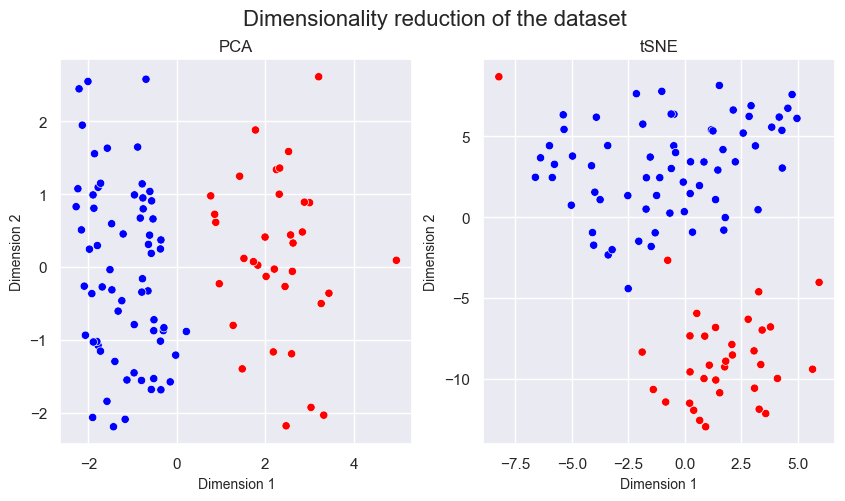

In [346]:
# Visualize the clustering solution using PCA/tSNE with colours associated with clusters (clusters given by the current clustering solution)
# LABELS = ...
PCA_tSNE_visualization(X_transformed, 5, kmeansPLUStrans.labels_, PAL)

In [347]:
# Compute the intra- and inter-clusters distances
[d, D] = intra_inter_cluster_distances(X_transformed, K, LABELS, kmeansPLUStrans.cluster_centers_, 'euclidean')

The intra-cluster distance of the clusters are:  [3.58 4.01]

All pair-wise inter-cluster distances:
 [[0.   3.47]
 [3.47 0.  ]]


# **Task 6: Clustering for feature selection** Repeat clustering with kmeans++ on the transformed dataset to find the best subset of 2 features to use (suppose you want to limit the dataset to 2 features, only).

In [348]:
# Search for the best combination of TWO attributes that optimize clustering with k-means++
# Hint: to find all possible unique combinations of 2 elements in a list of M elements, you can use intertools.combinations

# Retrieve all possible unique combinations (c)
import itertools as intert


#X_list = [tuple(row) for row in X]
c = intert.combinations(pd.DataFrame(X), 2)
unq = np.array(list(c))

In [349]:
# initialize inertia values
inertia_values = np.ones(len(unq))*1e1000

In [350]:
# Repeat clustering for every pair of features to find the best combination (with minimum SSE)
for q in range(len(unq)):
  # Apply k-means++ clustering on the scaled dataset with only two features at the time
  kmeansTMP = KMeans(n_clusters=K, init='k-means++', n_init = 4, max_iter = 300, tol=0.0001, verbose = 1, random_state = 358).fit(X_transformed[:,unq[q]])
  inertia_values[q] = kmeansTMP.inertia_

  # to store the best clustering solution (for later visualization)
  if kmeansTMP.inertia_ <= np.min(inertia_values):
      best_kmeans   = kmeansTMP
      best_features = unq[q]

Initialization complete
Iteration 0, inertia 247.83171511024676.
Iteration 1, inertia 133.01938249320457.
Iteration 2, inertia 130.649588191909.
Iteration 3, inertia 129.22241751763613.
Iteration 4, inertia 127.9590130391838.
Iteration 5, inertia 127.09492303311816.
Iteration 6, inertia 126.2354403244741.
Iteration 7, inertia 125.40135280789407.
Iteration 8, inertia 125.01396542573954.
Iteration 9, inertia 124.86759241830049.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 253.8383775412058.
Iteration 1, inertia 130.32957988554034.
Iteration 2, inertia 129.0062101434634.
Iteration 3, inertia 126.97076274893195.
Iteration 4, inertia 125.71649141315427.
Iteration 5, inertia 124.9689178292424.
Iteration 6, inertia 124.33690154258811.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 140.64089426589743.
Iteration 1, inertia 137.22522035266252.
Iteration 2, inertia 137.02156868506145.
Iteration 3, inertia 13

In [351]:
# Report the inertia
print('The two best features to combine are (%d,%d),' % (best_features[0], best_features[1]), "giving an SSE equal to %.2f." % np.min(inertia_values))

The two best features to combine are (6,8), giving an SSE equal to 56.67.


In [352]:
# Compute the intra- and inter-clusters distances
[d, D] = intra_inter_cluster_distances(X_transformed[:,best_features], K, kmeansTMP.labels_, kmeansTMP.cluster_centers_, 'euclidean')

The intra-cluster distance of the clusters are:  [1.31 0.76]

All pair-wise inter-cluster distances:
 [[0. 2.]
 [2. 0.]]


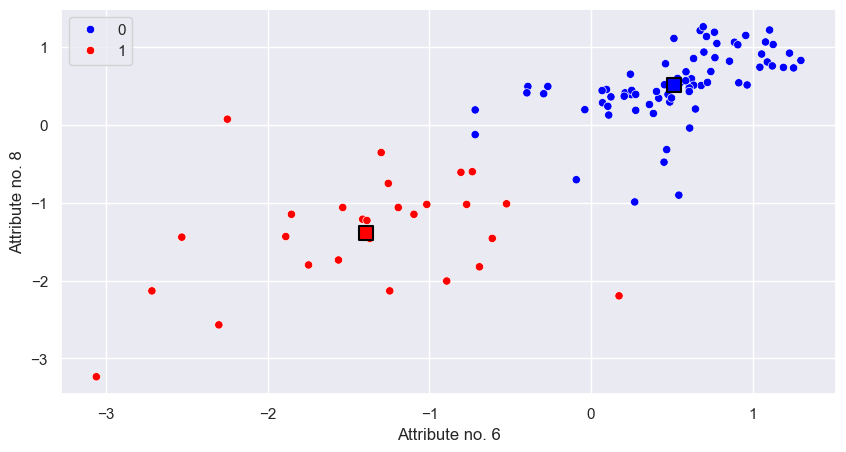

In [353]:
# Scatterplot the best clustering solution with the best combination of two features
fig6 = plt.figure('TITLE', figsize=(10,5))
PAL = ['blue', 'red']
  
sns.scatterplot(x=X_transformed[:,best_features[0]], y=X_transformed[:,best_features[1]], hue=best_kmeans.labels_, palette=PAL)
for k in range(K):
    plt.scatter(x=best_kmeans.cluster_centers_[k,0], y=best_kmeans.cluster_centers_[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)

sns.set_theme(style='dark')
plt.xlabel(f'Attribute no. {best_features[0]}' )
plt.ylabel(f'Attribute no. {best_features[1]}')
plt.grid()
plt.show()

In [354]:
kmeansTMP.cluster_centers_

array([[-1.38849697,  0.3009117 ],
       [ 0.56713256, -0.1229076 ]])

PCA: explained variation per principal component: [0.92 0.08]

Applying tSNE...


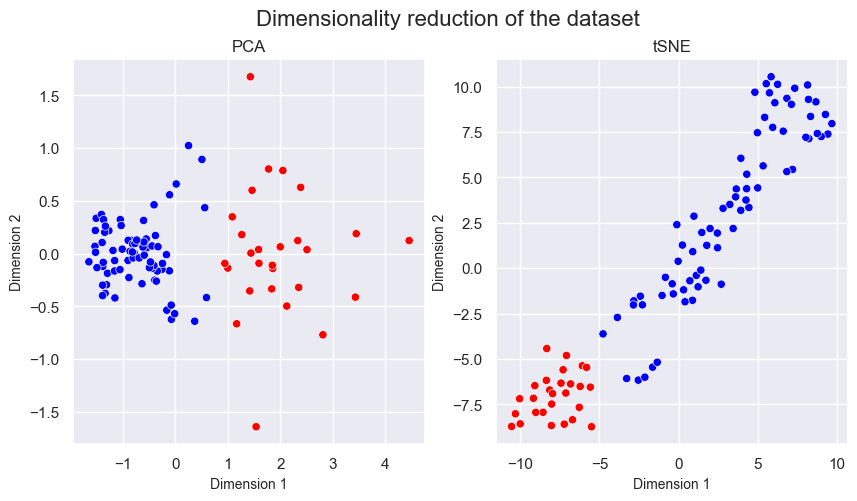

In [355]:
# Visualize the clustering solution using PCA/tSNE with colours associated with clusters (clusters given by the current clustering solution)
LABELS = best_kmeans.labels_
PCA_tSNE_visualization( X_transformed[:,best_features] , 2, LABELS, PAL)



---


## **_This is the end of Lab#4 session._**


---



---

